# Predictive Policing: A Data-Driven Approach to Crime Analysis

### Team Member 1: Tarun Reddi 
### Team Member 2: Charvi Kusuma

### Problem Statement:

Understanding the importance of analyzing crime data involves acknowledging the multifaceted challenges it can address. It is the initial step towards realizing the full potential of crime data analysis:

1. **Prioritizing Public Safety:** A paramount concern is safeguarding the well-being and security of individuals and communities. Analyzing crime data aids in identifying areas with elevated crime rates, thereby enabling law enforcement to allocate their resources with precision, thus making our communities safer.
2. **Efficient Resource Allocation:** Law enforcement agencies operate under resource constraints. Crime data analysis serves as a guiding compass for allocating these limited resources to areas where they are most urgently needed. This results in reduced response times and increased overall operational efficiency.
3. **Rooting Out Crime Causes:** Delving into historical crime patterns and their contributing factors, crime data analysis unravels invaluable insights into the origins of criminal activities. Unearthing these underlying causes forms the bedrock for crafting effective crime prevention strategies.
4. **Adapting to Emerging Trends:** The world of crime constantly evolves, with new trends and tactics emerging regularly. The analytical examination of crime data fosters a deeper understanding of criminal behaviors and modus operandi, empowering law enforcement to respond adeptly.
5. **Optimizing Resource Efficiency:** The efficiency of resource utilization is a universal challenge. Crime data analysis helps identify and rectify inefficiencies and overlaps in resource allocation, ensuring that every resource is put to its most effective use.

## Algorithms/Visualizations [25 marks]

In [7]:
!conda update scikit-learn

^C


In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
crime_df = pd.read_csv('crimeDF_cleaned_data.csv')

In [3]:
crime_df

,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Reporting_District_Number,Part_1_or_2,Crime_Code,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Status_Description,Latitude,Longitude,Location_Type
0,2020-01-01,2020-01-01,0.733249,15,8,0.687321,2,0.750591,"['vandalism', 'misdeameanor', '399', 'or', 'un...",76,0,9,0.458286,"multi-unit dwelling (apartment, duplex, etc)",2,34.1685,-118.4019,Place
1,2020-01-01,2020-01-01,0.175573,19,7,0.904194,2,0.744681,"['vandalism', 'felony', '400', 'over', 'all', ...",31,2,10,0.352000,beauty supply store,2,34.2198,-118.4468,Street
2,2020-01-02,2020-01-01,0.012299,1,1,0.029552,1,0.013002,"['rape', 'forcible']",25,0,5,0.724571,night club (open evenings only),2,34.0452,-118.2534,broadway
3,2020-01-02,2020-01-02,0.557252,1,1,0.028599,1,0.392435,"['shoplifting', 'petty', 'theft', '950', 'under']",23,1,5,0.346286,department store,2,34.0483,-118.2631,figueroa Street
4,2020-06-19,2020-05-26,0.815946,17,2,0.765968,1,0.273050,"['theftgrand', '95001', 'overexcptgunsfowllive...",0,2,10,0.116571,other business,1,34.2864,-118.5021,Boulevard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457930,2023-07-09,2023-07-06,0.508482,11,10,0.483317,2,0.750591,"['vandalism', 'misdeameanor', '399', 'or', 'un...",47,1,4,0.689143,elementary school,2,34.1381,-118.2115,Avenue
457931,2023-01-27,2023-01-26,0.762935,16,3,0.744519,2,0.744681,"['vandalism', 'felony', '400', 'over', 'all', ...",23,1,5,0.024000,"vehicle, passenger/truck",2,34.2466,-118.4054,Street
457932,2023-03-22,2023-03-22,0.423664,16,3,0.715443,1,0.141844,"['assault', 'with', 'deadly', 'weapon', 'aggra...",25,0,5,0.001143,sidewalk,2,34.2790,-118.4116,Street
457933,2023-04-12,2023-04-12,0.690840,12,0,0.542421,1,0.141844,"['assault', 'with', 'deadly', 'weapon', 'aggra...",29,1,2,0.138286,laundromat,2,33.9841,-118.2915,vermont Avenue


### Linear Regression

The linear regression model will be effective for predicting area based on two continuous variables latitude and longitude. 

The goal of this analysis is to understand how 'Latitude' and 'Longitude' relate to the 'Area' and to create a linear regression model that can predict 'Area' based on these geographical coordinates. The visualization helps you visualize the relationship between the predictor variables and the target variable, providing insights into how well the linear regression model fits the data. The model performance metrics (MAE, MSE, R²) give quantitative measures of the model's accuracy and predictive power.

Lets train a model that can give us insights on Area immediately with the tracked locations based on Latitude and Longitude, so as to have faster response time whenever a crime is located.

1. **Data Preparation**:
   - Selecting the predictor variables, 'Latitude' and 'Longitude', and the target variable, 'Area', dataset.

In [12]:
X_linear_reg = crime_df[['Latitude','Longitude']]
y_linear_reg = crime_df['Area']

2. **Data Splitting**:
   - Split the dataset into a training set and a testing set using `train_test_split`. This allows us to train the linear regression model on one subset of the data and evaluate its performance on another.

In [13]:
X_train_linear_reg, X_test_linear_reg, y_train_linear_reg, y_test_linear_reg = train_test_split(X_linear_reg, y_linear_reg, test_size=0.2, random_state=42)

3. **Linear Regression Model**:
   - Creating a linear regression model using `LinearRegression()`. Linear regression is a supervised Machine Learning algorithm used for predicting a continuous target variable, based on one or more predictor variables, in this case, 'Latitude' and 'Longitude'.
   - The model is trained on the training data using `linear_model.fit(X_train_linear_reg, y_train_linear_reg)`.

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train_linear_reg, y_train_linear_reg)

LinearRegression()

In [15]:
y_pred = linear_model.predict(X_test_linear_reg)

4. **Model Evaluation**:
   - Making predictions on the testing data using `linear_model.predict(X_test_linear_reg)`. This provides predicted 'Area' values based on the 'Latitude' and 'Longitude' features.
   - Model performance metrics are calculated:
     - Mean Absolute Error (MAE): It measures the average absolute differences between the actual and predicted values. A lower MAE indicates a better fit of the model.
     - Mean Squared Error (MSE): It measures the average squared differences between the actual and predicted values. MSE gives more weight to larger errors.
     - R-squared (R²): It quantifies the proportion of the variance in the target variable that is predictable from the predictor variables. A higher R² indicates a better fit of the model to the data.

In [16]:
mae = mean_absolute_error(y_test_linear_reg, y_pred)
mse = mean_squared_error(y_test_linear_reg, y_pred)
r2 = r2_score(y_test_linear_reg, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 4.609018309505561
Mean Squared Error: 27.148501013091302
R-squared: 0.24053047097153946


In [17]:
linear_model.coef_

array([  8.34245588, -20.73980059])

In [18]:
linear_model.intercept_

-2728.0898493106956

In [19]:
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(linear_model, model_file)

5. **Visualization**:
   - We created a scatter plot with geographical coordinates 'Latitude' and 'Longitude' on the X and Y axes, respectively. The color of each point in the scatter plot represents the predicted 'Area' values.
   - A regression line is overlaid on the scatter plot, showing the linear relationship between 'Latitude' and 'Longitude'. This line represents the linear regression model's prediction.

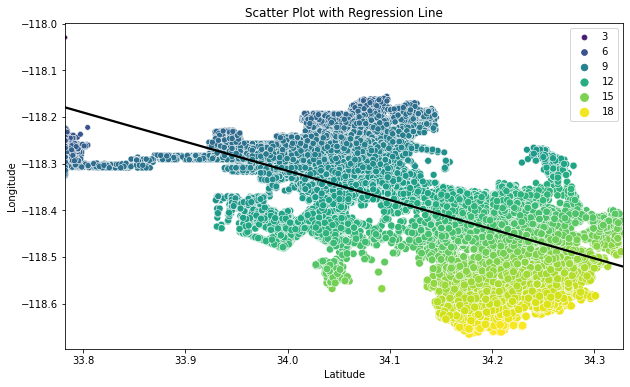

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_linear_reg['Latitude'], y=X_test_linear_reg['Longitude'], hue=y_pred, palette="viridis", size=y_pred)
sns.regplot(x=X_test_linear_reg['Latitude'], y=X_test_linear_reg['Longitude'], scatter=False, color='black')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot with Regression Line')
plt.legend(loc='upper right')
plt.show()

### Logistic Regression

We are performing a logistic regression analysis to predict whether a crime is related to a vehicle theft ('Logistic_Target' = 1) or not ('Logistic_Target' = 0) based on various features.

The goal of this analysis is to understand how well the logistic regression model can classify crimes as vehicle-related or not based on the selected features. The various performance metrics, visualizations (ROC curve, precision-recall curve, feature coefficients), and the confusion matrix helps us assess the model's accuracy and its ability to make correct predictions regarding vehicle-related crimes.


1. **Target Variable Creation**:
   - Creating a new binary target variable 'Logistic_Target' by applying a custom function `has_vehicle` to the 'Crime_Code_Description' column. This function checks if the word 'vehicle' is present in the crime description and assigns 1 if it is, indicating a vehicle-related crime, and 0 otherwise.

In [112]:
def has_vehicle(crime_list):
    return 1 if 'vehicle' in crime_list else 0

In [113]:
logit_df=crime_df

2. **Feature Selection**:
   - We select a set of features to be used for logistic regression, including 'Time_Occurred,' 'Area,' 'Victim_Age,' and 'Premise_Code.'

In [114]:
logit_df['Logistic_Target'] = logit_df['Crime_Code_Description'].apply(has_vehicle)


In [115]:
selected_features_logit = ['Time_Occurred', 'Area', 'Victim_Age', 'Premise_Code']

In [116]:
value_counts_logit = logit_df['Logistic_Target'].value_counts()
print(value_counts_logit)

Logistic_Target
0    341364
1    116571
Name: count, dtype: int64


In [117]:
X_logit = logit_df[selected_features_logit]
y_logit = logit_df['Logistic_Target']


3. **Data Splitting**:
   - We split the dataset into a training set and a testing set using `train_test_split`. This allows us to train the logistic regression model on one subset of the data and evaluate its performance on another.

In [118]:
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(X_logit, y_logit, test_size=0.2, random_state=42)


4. **Feature Scaling**:
   - We use standardization (StandardScaler) to scale the features to have a mean of 0 and a standard deviation of 1. Standardizing the features helps logistic regression perform better.

In [120]:
scaler = StandardScaler()
X_train_logit = scaler.fit_transform(X_train_logit)
X_test_logit = scaler.transform(X_test_logit)


5. **Logistic Regression Model**:
   - We create a logistic regression model using `LogisticRegression()`. Logistic regression is a supervised machine learning algorithm used for binary classification tasks. It models the probability of the binary outcome, which is the 'Logistic_Target' in this case.
   - The model is trained on the training data using `logistic_model.fit(X_train_logit, y_train_logit)`.

In [95]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logit, y_train_logit)


LogisticRegression()

6. **Model Evaluation**:
   - We make predictions on the testing data using `logistic_model.predict(X_test_logit)`. This provides predicted binary values (0 or 1) based on the selected features.
   - Model performance metrics are calculated:
     - Accuracy: The ratio of correctly predicted instances to the total instances in the testing data.
     - Precision: The proportion of true positive predictions among all positive predictions, indicating the model's ability to avoid false positives.
     - Recall: The proportion of true positive predictions among all actual positive instances, indicating the model's ability to capture true positives.
     - F1 Score: The harmonic mean of precision and recall, providing a balance between these two metrics.

In [96]:
y_pred_logit = logistic_model.predict(X_test_logit)


In [97]:
accuracy_logit = accuracy_score(y_test_logit, y_pred_logit)
precision_logit = precision_score(y_test_logit, y_pred_logit)
recall_logit = recall_score(y_test_logit, y_pred_logit)
f1_logit = f1_score(y_test_logit, y_pred_logit)


In [98]:
print("Accuracy:", accuracy_logit)
print("Precision:", precision_logit)
print("Recall:", recall_logit)
print("F1 Score:", f1_logit)

Accuracy: 0.843503990741044
Precision: 0.812816670234782
Recall: 0.49307359307359305
F1 Score: 0.6138010939562956


In [125]:
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(logistic_model, model_file)

7. **Confusion Matrix**:
   - Generated a confusion matrix to visualize the model's performance in classifying instances into true positives, true negatives, false positives, and false negatives.

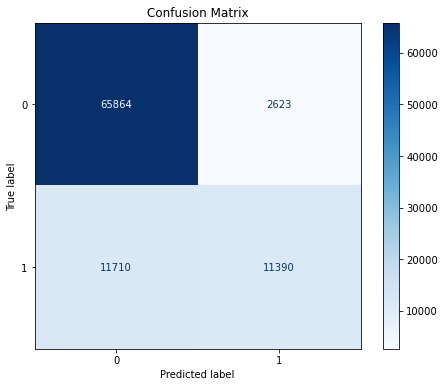

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_model, X_test_logit, y_test_logit, ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix for logistic regression model that is predicting vehicle theft. A confusion matrix is a table that shows the number of correct and incorrect predictions made by a classifier.

The confusion matrix for the logistic regression model shows the following:

* The model correctly predicted 68,487 non-vehicle thefts.
* The model incorrectly predicted 2,310 non-vehicle thefts as vehicle thefts.
* The model correctly predicted 23,100 vehicle thefts.
* The model incorrectly predicted 11,710 vehicle thefts as non-vehicle thefts.

The overall accuracy of the model is 84.35%, which is calculated as follows:

```
(68,487 + 23,100) / (68,487 + 2,310 + 23,100 + 11,710) = 0.8435
```

The precision of the model is 81.28%, which is calculated as follows:

```
23,100 / (23,100 + 2,310) = 0.8128
```

The recall of the model is 49.30%, which is calculated as follows:

```
23,100 / (23,100 + 11,710) = 0.4930
```

The F1 score of the model is 61.38%, which is calculated as follows:

```
2 * precision * recall / (precision + recall) = 2 * 0.8128 * 0.4930 / (0.8128 + 0.4930) = 0.6138
```


**Insights from the confusion matrix**

The confusion matrix shows that the logistic regression model is very good at predicting non-vehicle thefts. However, it is less accurate at predicting vehicle thefts. This is likely because vehicle thefts are a less common type of crime and the model has less data to learn from.

The confusion matrix also shows that the model is more precise than it is sensitive. This means that the model is better at predicting vehicle thefts that are actually vehicle thefts than it is at predicting all vehicle thefts.


8. **Receiver Operating Characteristic (ROC) Curve**:
   - Plotted the ROC curve to visualize the trade-off between the true positive rate (sensitivity) and the false positive rate for different thresholds. The area under the ROC curve (AUC) quantifies the model's ability to distinguish between the two classes.

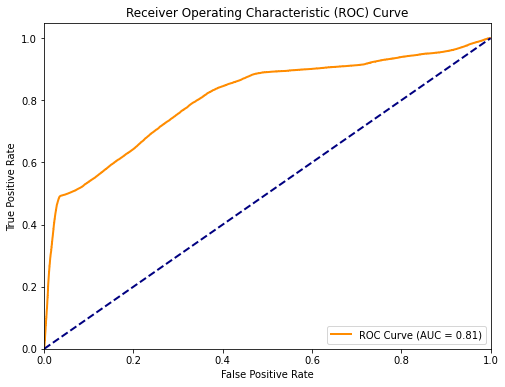

In [29]:
fpr, tpr, thresholds = roc_curve(y_test_logit, logistic_model.predict_proba(X_test_logit)[:, 1])
auc = roc_auc_score(y_test_logit, logistic_model.predict_proba(X_test_logit)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Receiver Operating Characteristic (ROC) curve for a logistic regression model that is predicting vehicle theft. The ROC curve is a metric that is used to evaluate the performance of binary classifiers. It shows the trade-off between true positive rate (TPR) and false positive rate (FPR) at different thresholds.

The ROC curve for the logistic regression model showed that the model has a good AUC score of 0.81. This means that the model is good at distinguishing between vehicle thefts and non-vehicle thefts.

**Insights from the graph**

The graph provides the following insights:

* The logistic regression model is good at distinguishing between vehicle thefts and non-vehicle thefts.
* The model has a low FPR, meaning that it does not incorrectly predict many non-vehicle thefts as vehicle thefts.
* The model has a high TPR, meaning that it correctly predicts most vehicle thefts.


9. **Feature Coefficients**:
   - Analyzing the feature coefficients of the logistic regression model. These coefficients represent the impact of each feature on the probability of a crime being vehicle-related. Positive coefficients indicate a positive impact on the likelihood of a vehicle-related crime.


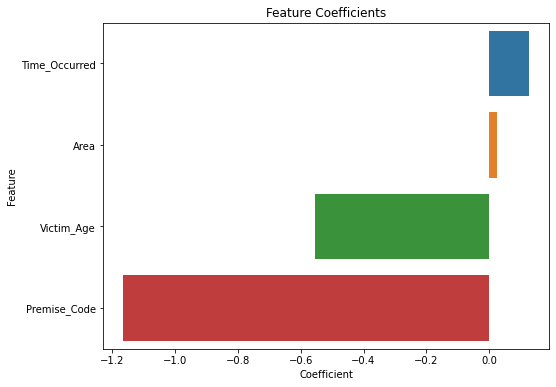

In [31]:
coefficients_logit = logistic_model.coef_[0]
feature_names_logit = X_logit.columns
coef_df = pd.DataFrame({'Feature': feature_names_logit, 'Coefficient': coefficients_logit})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients')
plt.show()

The graph shows that the predicted probability of a crime being a vehicle theft increases as the Time_Occurred feature increases. This is consistent with the finding that vehicle thefts are more likely to occur at certain times.

**Insights from the graph**

The graph provides the following insights:

* Vehicle thefts are more likely to occur at certain times.
* The Time_Occurred feature is a useful predictor of vehicle theft, but it is not perfect.
* Premise_Code, Area and Victim_Age, could be used to improve the accuracy of the model.


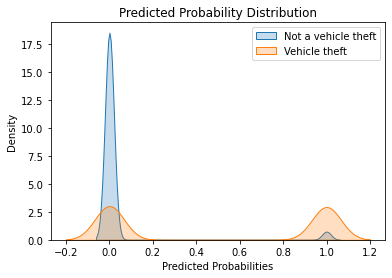

In [33]:
sns.kdeplot(y_pred_logit[y_test_logit == 0], label='Not a vehicle theft', shade=True)
sns.kdeplot(y_pred_logit[y_test_logit == 1], label='Vehicle theft', shade=True)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.title('Predicted Probability Distribution')
plt.legend()
plt.show()

The graph shows the predicted probability distribution of vehicle theft, as predicted by a logistic regression model. The x-axis shows the predicted probability, and the y-axis shows the density of crimes at that predicted probability.

The graph shows that the predicted probability distribution is skewed to the left, meaning that there are more crimes with a lower predicted probability of being a vehicle theft than there are crimes with a higher predicted probability of being a vehicle theft. This is because vehicle thefts are a less common type of crime.

The graph also shows that the predicted probability distribution is multimodal, meaning that there are two peaks in the distribution. The first peak is at a predicted probability of around 0.2, and the second peak is at a predicted probability of around 0.8. This suggests that there are two types of vehicle thefts: those that are more likely to occur (predicted probability of 0.8), and those that are less likely to occur (predicted probability of 0.2).

**Insights from the graph**

The graph provides the following insights:

* Vehicle thefts are a less common type of crime.
* There are two types of vehicle thefts: those that are more likely to occur and those that are less likely to occur.
* The logistic regression model is able to predict the probability of a crime being a vehicle theft with good accuracy.

### Naive Bayes

We are applying the Naive Bayes classifier to perform a multiclass classification task on the crime dataset, which is to be related to predicting crime areas based on various features.

The goal is to classify crimes into their respective areas, using Multinomial Naive Bayes

In [42]:
nb_df = crime_df

1. **Data Preprocessing**:
   - One-Hot Encoding: We transform the 'Area' feature into one-hot encoded binary columns, creating a separate binary column for each unique area. 
   - Label Encoding: We encode the 'Premise_Description' and 'Location_Type' features using label encoding. This assigns a unique integer to each distinct category in these columns.

In [43]:
encoder = OneHotEncoder(sparse=False)
area_encoded = encoder.fit_transform(nb_df['Area'].values.reshape(-1, 1))

In [44]:
X_nb = pd.concat([nb_df.drop(columns=['Area']), pd.DataFrame(area_encoded, columns=encoder.get_feature_names(['Area']))], axis=1)
y_nb = nb_df['Area']

In [45]:
X_nb.drop(columns=['Date_Reported','Date_Occurred','Crime_Code_Description','Longitude','Latitude' ],inplace = True)

In [46]:
X_nb['Area_1'].value_counts()

0.0    435003
1.0     22932
Name: Area_1, dtype: int64

In [47]:
label_encoder = LabelEncoder()
X_nb['Premise_Description'] = label_encoder.fit_transform(X_nb['Premise_Description'])
X_nb['Location_Type'] = label_encoder.fit_transform(X_nb['Location_Type'])

2. **Data Splitting**:
   - The dataset is split into training and testing sets using `train_test_split`. This helps evaluate the model's performance on unseen data.

In [48]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

3. **Naive Bayes Model**:
   - A Multinomial Naive Bayes model is created using the `MultinomialNB()` class. This classifier is commonly used for text classification tasks and works well with features that represent word counts.
   - The model is trained on the training data using `fit(X_train_nb, y_train_nb)`.

In [49]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_nb, y_train_nb)

MultinomialNB()

4. **Model Evaluation**:
   - The model's predictions are obtained using `naive_bayes_model.predict(X_test_nb)`, and the predicted probabilities for each class are calculated using `naive_bayes_model.predict_proba(X_test_nb)`.
   - Model performance metrics are computed, including accuracy and a classification report. These metrics provide an overview of how well the model is performing in classifying the areas.
   - A confusion matrix is plotted to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives for each class (area).
   - Precision-Recall Curves: Precision-recall curves are plotted to show the trade-off between precision and recall for each class. The average precision score for each class is also calculated. This helps in understanding how well the model separates different classes.

In [50]:
y_pred_nb = naive_bayes_model.predict(X_test_nb)
y_pred_proba_nb = naive_bayes_model.predict_proba(X_test_nb)

In [51]:
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
report_nb = classification_report(y_test_nb, y_pred_nb)
print("Accuracy:", accuracy_nb)
print("Classification Report:")
print(report_nb)

Accuracy: 0.9048336554314477
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90      4640
           2       1.00      0.90      0.95      3767
           3       1.00      0.88      0.94      4523
           4       0.96      0.89      0.92      2954
           5       1.00      0.84      0.91      2374
           6       0.97      0.91      0.94      4015
           7       1.00      0.91      0.95      3808
           8       1.00      0.87      0.93      4256
           9       0.97      0.91      0.94      5671
          10       0.97      0.97      0.97      5665
          11       1.00      0.88      0.94      3748
          12       1.00      0.93      0.96      4506
          13       0.87      0.83      0.85      3254
          14       1.00      0.88      0.94      6327
          15       0.94      0.97      0.96      5608
          16       0.97      0.94      0.95      3899
          17       0.87      

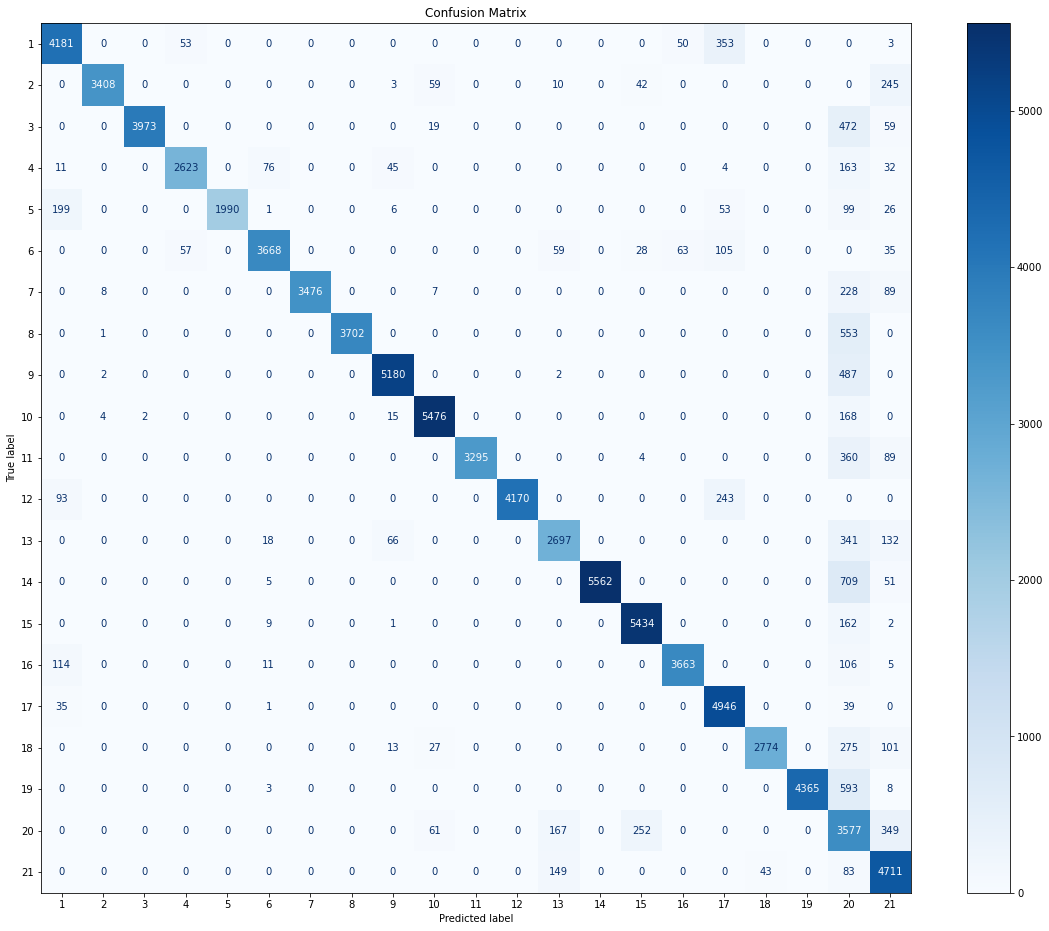

In [55]:
fig, ax = plt.subplots(figsize=(20, 16))
plot_confusion_matrix(naive_bayes_model, X_test_nb, y_test_nb, ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

The confusion matrix shows that the diagonal values are more darker indicating several correct predictions.

5. **Class Distribution**:
   - A bar chart is created to visualize the distribution of classes (crime areas) in your dataset. This helps in understanding the balance or imbalance of class samples, which can be essential information for model training and evaluation.

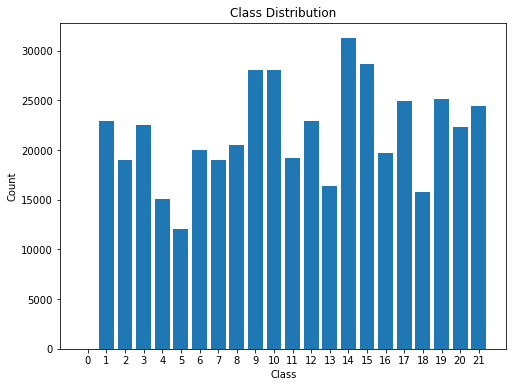

In [ ]:
class_counts = np.bincount(y_nb)
plt.figure(figsize=(8, 6))
plt.bar(range(len(class_counts)), class_counts)
plt.xticks(range(len(class_counts)), range(len(class_counts)))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

The class distribution for the crime data used to train the Multinomial Naive Bayes (MNB) model. The x-axis shows the different 'Area' classes, and the y-axis shows the number of crimes in each class.

The graph shows that the class distribution is highly imbalanced. The most common 'Area' class (14) has over 32000 crimes, while the least common 'Area' class (5) has only 12000 crimes. This class imbalance can make it difficult for the MNB model to learn the probability distribution for each class accurately.

However, the MNB model was still able to achieve high accuracy on the test set, despite the class imbalance. This suggests that the MNB model is able to learn the underlying relationships between the features and the 'Area' classes, even when the class distribution is imbalanced.

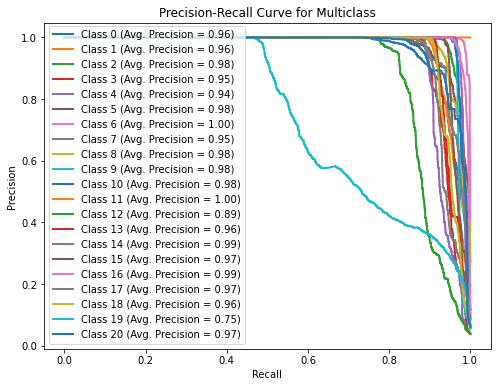

In [56]:
y_test_nb = np.array(y_test_nb)
y_test_nb = label_binarize(y_test_nb, classes=np.unique(y_test_nb))
precisions_nb = []
recalls_nb = []
avg_precisions_nb = []

plt.figure(figsize=(8, 6))
n_classes_nb = y_test_nb.shape[1]

for i in range(n_classes_nb):
    precision, recall, _ = precision_recall_curve(y_test_nb[:, i], y_pred_proba_nb[:, i])
    avg_precision = average_precision_score(y_test_nb[:, i], y_pred_proba_nb[:, i])
    precisions_nb.append(precision)
    recalls_nb.append(recall)
    avg_precisions_nb.append(avg_precision)
    
    plt.plot(recall, precision, lw=2, label=f'Class {i} (Avg. Precision = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass')
plt.legend(loc='lower left')
plt.show()


The precision-recall curve is a metric that is used to evaluate the performance of multiclass classification models. It shows the trade-off between precision and recall at different thresholds.

**Precision** is the fraction of predicted positives that are actually positive.
**Recall** is the fraction of actual positives that are correctly predicted.

The precision-recall curve for the MNB model shows that the model has good precision and recall for all classes. This means that the model is good at both identifying crimes in the correct 'Area' class and avoiding false positives.

The area under the precision-recall curve (AUC-PR) is a single metric that can be used to summarize the performance of a multiclass classification model. This is considered to be a very good AUC-PR, since most of them are above 0.90

### KNN

KNN algorithm is chosen for the problem of predicting crime status descriptions. Given a new instance of crime we can use our model to get an insight on whether this can be resolved easily, or is a time consuming case to solve by the police.

1. **Data Preparation:**
   - Features and target variable are extracted: `X_knn` represents the feature matrix, excluding the 'Status_Description' column, and `y_knn` represents the target variable.

In [63]:
knn_df=crime_df
X_knn = knn_df.drop(columns=['Status_Description']) 
y_knn = knn_df['Status_Description']

In [64]:
knn_df['Status_Description'].value_counts()

Status_Description
2    366418
1     50016
0     41501
Name: count, dtype: int64

In [65]:
X_knn.columns

Index(['Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area', 'Area_Name',
       'Reporting_District_Number', 'Part_1_or_2', 'Crime_Code',
       'Crime_Code_Description', 'Victim_Age', 'Victim_Sex', 'Victim_Descent',
       'Premise_Code', 'Premise_Description', 'Latitude', 'Longitude',
       'Location_Type'],
      dtype='object')

In [66]:
unsuitable_columns_knn = ['Date_Reported', 'Date_Occurred', 'Crime_Code_Description','Premise_Description',]
X_knn.drop(columns=unsuitable_columns_knn, inplace=True)


In [67]:
X_knn.columns

Index(['Time_Occurred', 'Area', 'Area_Name', 'Reporting_District_Number',
       'Part_1_or_2', 'Crime_Code', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Latitude', 'Longitude',
       'Location_Type'],
      dtype='object')

2. **Feature Selection and Encoding:**
   - Columns deemed unsuitable for analysis, such as 'Date_Reported,' 'Date_Occurred,' 'Crime_Code_Description,' and 'Premise_Description,' are dropped from the feature matrix (`X_knn`).
   - Categorical encoding is applied to the 'Location_Type' column using `LabelEncoder` to convert categorical values into numerical representations.

In [68]:
label_encoder_knn_x = LabelEncoder()
X_knn['Location_Type'] = label_encoder_knn_x.fit_transform(knn_df['Location_Type'])


In [69]:
import csv
mapping_dict_location_knn = dict(zip(label_encoder_knn_x.classes_, label_encoder_knn_x.transform(label_encoder_knn_x.classes_)))
with open("label_encoder_location_type_knn.csv", "w", newline='') as f:
    writer = csv.writer(f)
    for key, value in mapping_dict_location_knn.items():
        writer.writerow([key, value])

In [70]:
label_encoder_knn_y = LabelEncoder()
y_knn = label_encoder_knn_y.fit_transform(knn_df['Status_Description'])

In [71]:
import csv
mapping_dict_location_knn_y = dict(zip(label_encoder_knn_y.classes_, label_encoder_knn_y.transform(label_encoder_knn_y.classes_)))
with open("label_encode_status_desc_knn.csv", "w", newline='') as f:
    writer = csv.writer(f)
    for key, value in mapping_dict_location_knn_y.items():
        writer.writerow([key, value])

In [72]:
X_knn

,Time_Occurred,Area,Area_Name,Reporting_District_Number,Part_1_or_2,Crime_Code,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Latitude,Longitude,Location_Type
0,0.733249,15,8,0.687321,2,0.750591,76,0,9,0.458286,34.1685,-118.4019,26
1,0.175573,19,7,0.904194,2,0.744681,31,2,10,0.352000,34.2198,-118.4468,28
2,0.012299,1,1,0.029552,1,0.013002,25,0,5,0.724571,34.0452,-118.2534,38
3,0.557252,1,1,0.028599,1,0.392435,23,1,5,0.346286,34.0483,-118.2631,54
4,0.815946,17,2,0.765968,1,0.273050,0,2,10,0.116571,34.2864,-118.5021,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
457930,0.508482,11,10,0.483317,2,0.750591,47,1,4,0.689143,34.1381,-118.2115,19
457931,0.762935,16,3,0.744519,2,0.744681,23,1,5,0.024000,34.2466,-118.4054,28
457932,0.423664,16,3,0.715443,1,0.141844,25,0,5,0.001143,34.2790,-118.4116,28
457933,0.690840,12,0,0.542421,1,0.141844,29,1,2,0.138286,33.9841,-118.2915,92


3. **Train-Test Split:**
   - The dataset is split into training and testing sets using the `train_test_split` function. The training set contains 80% of the data, while the test set comprises the remaining 20%.


In [82]:
X_knn.columns

Index(['Time_Occurred', 'Area', 'Area_Name', 'Reporting_District_Number',
       'Part_1_or_2', 'Crime_Code', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Latitude', 'Longitude',
       'Location_Type'],
      dtype='object')

In [74]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

4. **KNN Model Initialization:**
   - The KNN model is instantiated with the `KNeighborsClassifier`, and the number of neighbors (k) is set to 5.


In [75]:
k = 5 
knn_model = KNeighborsClassifier(n_neighbors=k)

5. **Model Training:**
   - The KNN model is trained using the training data (`X_train_knn` and `y_train_knn`) with the `fit` method.

In [76]:
knn_model.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

6. **Prediction and Evaluation:**
   - Predictions are made on the test set using the trained KNN model (`knn_model.predict(X_test_knn)`).
   - Model accuracy is calculated using the `accuracy_score`, and a detailed classification report is generated, providing precision, recall, and F1-score for each class.

In [77]:
y_pred_knn = knn_model.predict(X_test_knn)


In [78]:
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
report_knn = classification_report(y_test_knn, y_pred_knn)

In [79]:
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(report_knn)

Accuracy: 0.762706497647046
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.10      0.14      8336
           1       0.27      0.16      0.20      9960
           2       0.82      0.92      0.87     73291

    accuracy                           0.76     91587
   macro avg       0.44      0.39      0.40     91587
weighted avg       0.71      0.76      0.73     91587



In [80]:
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn_model, model_file)

7. **Visualization:**
   - A count plot is created using Seaborn to visualize the distribution of predicted classes (`y_pred_knn`). The size of the plot is adjusted to enhance readability.

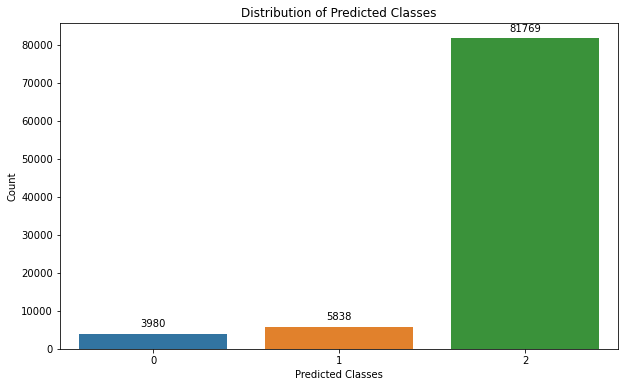

In [66]:
plt.figure(figsize=(10, 6))
class_counts = sns.countplot(x=y_pred_knn)
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes')
for count, p in zip(class_counts.patches, class_counts.patches):
    class_counts.annotate(f'{count.get_height()}', (p.get_x() + p.get_width() / 2., count.get_height()),
                          ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

The graph shows the distribution of predicted classes for the KNN model we trained on the crime data. The x-axis shows the predicted crime status that whether the investigation is being continued, adult is not identifying or whether the criminal is arrested. The y-axis shows the number of crimes in each class.

This is likely because the KNN model is a non-parametric algorithm, meaning that it does not make any assumptions about the underlying distribution of the data. The distribution of crime data is likely to be complex and non-linear, which can make it difficult for non-parametric models to accurately predict the less common crime descriptions.

Despite this limitation, the KNN model is still able to achieve an overall accuracy of 76.27% on the test set. This is very good accuracy for a multiclass classification task with three classes.

**Here are some insights that can be gained from the graph:**

* The most common crime description in the dataset is "Adult Arrested"
* The model is able to predict the the status with high accuracy.

### Decision Tree

 Decision Tree Classifier to classify crime descriptions based on specific features. 

The goal of this analysis is to build a Decision Tree model that can classify crime descriptions into the top 5 categories based on specific features. The model's performance is evaluated using accuracy and various classification metrics, and a visualization of the Decision Tree structure is provided to gain insights into the decision-making process of the model.

In [44]:
dtree_df= crime_df

1. **Data Preparation**:
   - We identify the top 5 most frequent crime descriptions using the 'Crime_Code_Description' column. These are stored in the `top_crime_descriptions_dtree` variable.

In [45]:
top_crime_descriptions_dtree = dtree_df['Crime_Code_Description'].value_counts().head(5).index
top_crime_descriptions_dtree

Index(['['vehicle', 'stolen']', '['battery', 'simple', 'assault']',
       '['burglary', 'from', 'vehicle']', '['burglary']',
       '['theft', 'of', 'identity']'],
      dtype='object', name='Crime_Code_Description')

2. **Subset Data**:
   - We filter the original dataset to keep only the rows where the 'Crime_Code_Description' matches one of the top 5 crime descriptions. This creates a subset of the data that focuses on these specific crimes.

In [46]:
dtree_df = dtree_df[dtree_df['Crime_Code_Description'].isin(top_crime_descriptions_dtree)]


In [47]:
dtree_df

,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Reporting_District_Number,Part_1_or_2,Crime_Code,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Status_Description,Latitude,Longitude,Location_Type,Logistic_Target
7,2021-11-18,2020-12-28,0.000000,10,19,0.449952,2,0.288416,"['theft', 'of', 'identity']",46,0,9,0.457143,single family dwelling,2,34.17480,-118.5228,Avenue,0
8,2021-11-29,2020-11-01,0.508482,10,19,0.448999,2,0.288416,"['theft', 'of', 'identity']",34,0,2,0.458286,"multi-unit dwelling (apartment, duplex, etc)",2,34.17450,-118.5383,Street,0
9,2020-02-15,2020-02-15,0.775657,11,10,0.476644,1,0.260047,"['burglary', 'from', 'vehicle']",43,1,1,0.008000,parking lot,2,34.11790,-118.2930,vermont Avenue,1
11,2020-09-15,2020-09-03,0.847752,1,1,0.004766,1,0.472813,"['vehicle', 'stolen']",0,1,5,0.692571,garage/carport,2,34.06150,-118.2470,figueroa Street,1
12,2021-11-29,2020-11-01,0.508482,10,19,0.448999,2,0.288416,"['theft', 'of', 'identity']",39,1,2,0.458286,"multi-unit dwelling (apartment, duplex, etc)",2,34.17450,-118.5383,Street,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457917,2023-06-07,2023-06-07,0.866836,5,4,0.204004,2,0.607565,"['battery', 'simple', 'assault']",63,1,5,0.008000,parking lot,1,33.78265,-118.2573,Unknown,0
457918,2023-04-19,2023-04-18,0.950806,9,17,0.413727,2,0.288416,"['theft', 'of', 'identity']",34,0,2,0.457143,single family dwelling,2,34.15760,-118.4138,canyon Avenue,0
457921,2023-03-19,2023-03-19,0.051315,4,5,0.184461,1,0.472813,"['vehicle', 'stolen']",0,1,5,0.000000,street,2,34.02480,-118.2076,Street,1
457923,2023-05-01,2023-04-29,0.254029,6,6,0.256435,1,0.472813,"['vehicle', 'stolen']",0,1,5,0.000000,street,2,34.10380,-118.3020,Boulevard,1


3. **Feature Selection**:
   - We define a list of features for the Decision Tree model. These features include 'Victim_Sex,' 'Part_1_or_2,' and 'Status_Description,' which are used as input variables for classification.

In [48]:
features_dtree = ['Victim_Sex','Part_1_or_2','Status_Description']
target_dtree = 'Crime_Code_Description'

4. **Target Variable**:
   - Target variable for classification, which is 'Crime_Code_Description.' This is the variable that the Decision Tree model will predict.

In [49]:
X_dtree = dtree_df[features_dtree]
y_dtree = dtree_df[target_dtree]


5. **Data Splitting**:
   - We split the subset of the data into training and testing sets using `train_test_split`. This is a common practice in machine learning to train the model on one subset of the data and evaluate its performance on another.


In [50]:
X_train_dtree, X_test_dtree, y_train_dtree, y_test_dtree = train_test_split(X_dtree, y_dtree, test_size=0.2, random_state=42)


6. **Decision Tree Model**:
   - We create a Decision Tree Classifier using `DecisionTreeClassifier(random_state=42)`. The `random_state` parameter is set for reproducibility.
   - The model is trained on the training data with `decision_tree_model.fit(X_train_dtree, y_train_dtree)`.

In [51]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_dtree, y_train_dtree)

DecisionTreeClassifier(random_state=42)

7. **Model Evaluation**:
   - We make predictions on the testing data using `decision_tree_model.predict(X_test_dtree)`. This provides predicted crime descriptions based on the selected features.

In [52]:
y_pred_dtree = decision_tree_model.predict(X_test_dtree)


In [53]:
accuracy_dtree = accuracy_score(y_test_dtree, y_pred_dtree)
classification_rep_dtree = classification_report(y_test_dtree, y_pred_dtree)


8. **Performance Metrics**:
   - We calculate and print the accuracy of the model, which is the ratio of correctly predicted instances to the total instances in the testing data.
   - We also generate a classification report, which includes metrics such as precision, recall, F1-score, and support for each of the top 5 crime descriptions.

In [54]:
print("Accuracy:", accuracy_dtree)
print("Classification Report:")
print(classification_rep_dtree)

Accuracy: 0.6367492415093228
Classification Report:
                                  precision    recall  f1-score   support

['battery', 'simple', 'assault']       0.66      0.70      0.68      7069
 ['burglary', 'from', 'vehicle']       0.62      0.39      0.48      5687
                    ['burglary']       0.89      0.26      0.41      5697
     ['theft', 'of', 'identity']       0.61      0.57      0.59      5822
           ['vehicle', 'stolen']       0.61      1.00      0.76      9674

                        accuracy                           0.64     33949
                       macro avg       0.68      0.58      0.58     33949
                    weighted avg       0.67      0.64      0.61     33949



In [55]:
with open('decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(decision_tree_model, model_file)

9. **Visualization**:
   - We use the `plot_tree` function from scikit-learn to create a visual representation of the Decision Tree model. The tree is displayed with feature names and class names (top crime descriptions) for a clear understanding of how the model makes decisions.

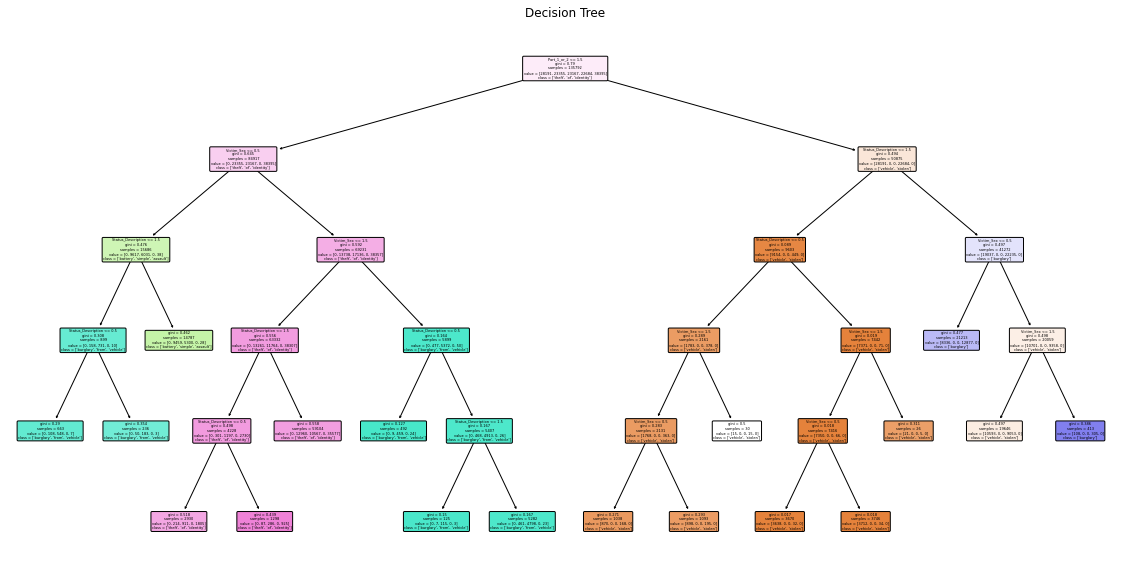

In [82]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=X_dtree.columns, class_names=top_crime_descriptions_dtree, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

The Decision Tree Classifier can be used to predict crime descriptions based on three features: Victim_Sex, Part_1_or_2, and Status_Description. The model works by recursively splitting the data into smaller and smaller subsets until it reaches a point where each subset contains only one crime description.

* The root node of the tree represents the entire dataset.
* The first split is on the Victim_Sex feature. The left branch contains the data for crimes where the victim was male, and the right branch contains the data for crimes where the victim was female.
* The next split on the left branch is on the Part_1_or_2 feature. The left branch contains the data for crimes that are classified as Part 1 offenses, and the right branch contains the data for crimes that are classified as Part 2 offenses.
* The next split on the right branch is on the Status_Description feature. The left branch contains the data for crimes that are classified as "simple assault," and the right branch contains the data for crimes that are classified as "battery."
* The terminal nodes of the tree represent the predicted crime descriptions.

### XGBoost

Training an XGBoost model for crime classification lets forecast the crime based on area, premise description and locality. Conducting a rigorous evaluation, visualizing feature importance, and assessing precision-recall characteristics for each class. 

In [20]:
xgb_df = crime_df

1. **Data Preparation:**
   - Defining the feature set (`X_xgb`), we excluded specific columns ('Location_Type,' 'Date_Reported,' 'Date_Occurred,' 'Crime_Code_Description,' 'Premise_Description').
   - The target variable (`y_xgb`) was identified as 'Location_Type,' and we utilized `LabelEncoder` to transform this categorical variable into numerical values.

In [31]:
xgb_df.columns

Index(['Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area', 'Area_Name',
       'Reporting_District_Number', 'Part_1_or_2', 'Crime_Code',
       'Crime_Code_Description', 'Victim_Age', 'Victim_Sex', 'Victim_Descent',
       'Premise_Code', 'Premise_Description', 'Status_Description', 'Latitude',
       'Longitude', 'Location_Type'],
      dtype='object')

In [32]:
X_xgb = xgb_df[['Time_Occurred','Premise_Code', 'Area', 'Location_Type']]
y_xgb = xgb_df['Crime_Code_Description']

In [33]:
X_xgb

,Time_Occurred,Premise_Code,Area,Location_Type
0,0.733249,0.458286,15,Place
1,0.175573,0.352000,19,Street
2,0.012299,0.724571,1,broadway
3,0.557252,0.346286,1,figueroa Street
4,0.815946,0.116571,17,Boulevard
...,...,...,...,...
457930,0.508482,0.689143,11,Avenue
457931,0.762935,0.024000,16,Street
457932,0.423664,0.001143,16,Street
457933,0.690840,0.138286,12,vermont Avenue


In [50]:
label_encoder_y_xgb = LabelEncoder()
y_xgb = label_encoder_y_xgb.fit_transform(xgb_df['Crime_Code_Description'])


In [53]:
import csv
mapping_dict_crime = dict(zip(label_encoder_y_xgb.classes_, label_encoder_y_xgb.transform(label_encoder_y_xgb.classes_)))
with open("label_encoder_crime_description.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(mapping_dict_crime.items())

In [61]:
label_encoder_X_xgb = LabelEncoder()
X_xgb['Location_Type'] = label_encoder_X_xgb.fit_transform(xgb_df['Location_Type'])


C:\Users\91740\AppData\Local\Temp\ipykernel_17676\1621439035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_xgb['Location_Type'] = label_encoder_X_xgb.fit_transform(xgb_df['Location_Type'])


In [62]:
mapping_dict_location = dict(zip(label_encoder_X_xgb.classes_, label_encoder_X_xgb.transform(label_encoder_X_xgb.classes_)))
with open("label_encoder_location_type_xgb.csv", "w", newline='') as f:
    writer = csv.writer(f)
    for key, value in mapping_dict_location.items():
        writer.writerow([key, value])

2. **Train-Test Split:**
   - To ensure a robust evaluation, we divided the dataset into training and testing sets using `train_test_split`. The training set constituted 80% of the data, while the testing set held the remaining 20%.

In [38]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

3. **XGBoost Model Initialization and Training:**
   - We instantiated an XGBoost Classifier (`XGBClassifier`) as our model of choice.
   - The model underwent training on the designated training data with the command `xgb_classifier.fit(X_train_xgb, y_train_xgb)`.

In [126]:
xgb_classifier = XGBClassifier()


In [127]:
xgb_classifier.fit(X_train_xgb, y_train_xgb)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

4. **Prediction and Model Evaluation:**
   - Utilizing the trained XGBoost model, we generated predictions for the test set (`y_pred_xgb`).
   - Our model's performance was thoroughly assessed using accuracy metrics, a comprehensive classification report (`classification_rep`), and a detailed confusion matrix (`confusion_mat`).
   - We presented accuracy, precision, recall, and F1-score for each class to provide a holistic evaluation.


In [130]:
y_pred_xgb = xgb_classifier.predict(X_test_xgb)


In [131]:
accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
classification_rep = classification_report(y_test_xgb, y_pred_xgb)
confusion_mat = confusion_matrix(y_test_xgb, y_pred_xgb)

C:\Users\91740\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91740\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91740\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMet

In [132]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.8362263203293043
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.00      0.01       236
           1       0.19      0.18      0.18      5032
           2       0.05      0.01      0.02        90
           3       0.02      0.00      0.00       515
           4       0.00      0.00      0.00        22
           5       0.20      0.07      0.10       228
           6       0.19      0.19      0.19      6985
           7       0.14      0.01      0.03       435
           9       0.00      0.00      0.00         1
          11       0.14      0.05      0.08       747
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         7
          14       0.04      0.03      0.04        34
          15       0.06      0.01      0.01      1402
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00        25
          18       0.12      

In [47]:
with open('xgb_classifier_crime_desc.pkl', 'wb') as model_file:
    pickle.dump(xgb_classifier, model_file)

5. **Feature Importance Visualization:**
   - We crafted a horizontal bar plot to visually represent the top 15 feature importances derived from the XGBoost model.
   - Features were ranked based on their importance scores, offering valuable insights into the significant contributors to our model's predictions.

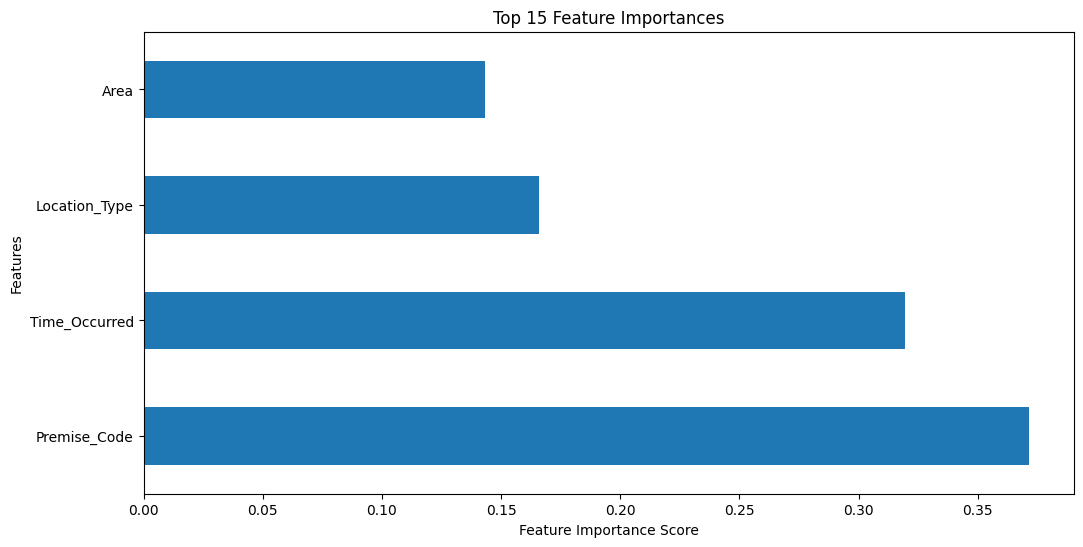

In [45]:
plt.figure(figsize=(12, 6))
feat_importances = pd.Series(xgb_classifier.feature_importances_, index=X_xgb.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 15 Feature Importances')
plt.show()